# Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`

## Data Wrangling
- First: Data are plural, and the singular is datum.
- The data must be **wrangled** or **cleaned** into some form that is amenable to analysis
- This can be an exhausting process, and there is no uniquely correct way to do it: choices have consequences
- Missing data is the key issue when cleaning data: Understanding which values are missing for some observations/variables, and understanding the implications for analysis
- Many key choices depend on what kind of analysis you plan to do

## Data Wrangling
- According to a survey by CloudFlower and popularized by Forbes, about 82% of data scientists' time is spent on cleaning and organizing data:

![Time use](https://github.com/ashleynguyen04/wrangling/blob/main/src/timespent.jpg?raw=1)

"76% of data scientists view data preparation as the least enjoyable part of their work."

## Replication and Open Science
- Before we go on: Never, ever edit the original data *file(s)*. Do not edit and overwrite the file. Never, ever do this.
- You never know what will matter later, so always keep the original data files in a safe place.
- Document everything you do in a commented script or markdown file so that in the future, you or someone else can **reproduce** the steps you took to clean the data.
- **Reproducibility** means that people can take your data and recreate your results on their own. **Replicability** means that people can do your entire project from scratch (experiment, data, analysis) and get similar results.
- The biggest threat to science is the inability to reproduce/replicate results, and a lack of transparency in how results were created: It destroys confidence in the entire enterprise, and makes it impossible for us to make progress.

## Files Containing Data
- These are the most common file formats I am aware of, and what programs or languages created them:

| File Format Extension | Likely Source |
| :---: | :---:|
|.csv | Any |
|.Rda, .Rdata | R |
|.dat | SAS |
|.sav | SPSS |
|.dta | Stata |
|.mat | MATLAB |
|.xls, .xlsx | Excel |
|.json | JavaScript Object Notation|
|.parquet | Apache parquet format|
|.orc | Optimized Row Columnar, for big data |

- Unless you have a good reason, .csv is probably the most accessible format for most people
- More modern formats like parquet and orc save space by storing values in a clever way. If a column is just 0's and 1's with mostly 0's for example, they'll just track the indices where a 1 appears, rather than storing the whole column.

## Codebooks
- Data come with documentation, which I am going to generically call a *codebook* or a *data dictionary*
- The documentation is usually not very good!
- It might be a formal codebook, or it might just be the survey itself that respondents filled out, or it might just be the html/javascript code that created the web page that captured the responses
- If you don't have a codebook you shouldn't be analyzing the data: You have no clue what it is
    - `Employees` might be a `True/False` about whether the firm has any employees at all, or it might be the number of employees it employs, and so on
- Be careful trusting the codebook: These often have errors

## Citing Data
- Whenever you use data, you should cite it:
    - Author or Creator: Who or what organization created these data?
    - Date of Publication: When was the data made available?
    - Title: What is the name of the dataset?
    - Electronic Location or Identifier: Where is a persistent location where the data are available? Is there a DOI or orchid or other unique identifier?
- We should do a better job of this

## Data
- We are typically interested in modelling some kind of phenomenon: defendants, atoms, stock prices, shark attacks, earthquakes, students, cancer, countries, ...
- A specific case or instance of the phenomenon is called an **observation**
- The observed attributes of a case are called **variables**
- The recorded value of a particular attribute for a particular observation is called a **value**
- For example, "What was the bond amount for defendant 1112?" "$550"
    - The variable is the bond amount
    - The observation is defendant 1112
    - The value of the bond for defendant 1112 is 550 dollars
    - The data consist of observations of attributes of different defendants in a legal system

## Data Frames
- We typically organize our data into dataframe
- You can think of it as stacking all of the observations $N$, row by row, where each column corresponds to a variable
- You can think of it as stacking all of the variables $L$, column by column, where each row corresponds to an observation
- This $N \times L$ object is known as a dataframe

## Matrices and Data Frames
- This kind of $N \times L$ object is more generally known as a matrix
- A **tuple** or **vector** is a list of values
- When we stack $L$ tuples/vectors $(x_1, x_2, ..., x_L)$ of length $N$ side by side, we get an $N \times L$ matrix:
$$
X = \left[ x_1, x_2, ..., x_K \right] = \left[ \begin{array}{cccc}
x_{11} & x_{12} & \dots  & x_{1K} \\
x_{21} & x_{22} & \dots  & x_{2K} \\
\vdots & \vdots & \ddots & \vdots \\
x_{N1} & x_{N2} & \dots & x_{NK} \\
\end{array}\right]
$$
- The indices for $x_{ik}$ are $ik=(\text{row},\text{column})$, so the tuple $(x_{i1},...,x_{iK})$ is row $i$ and the tuple $(x_{1k}, x_{2k},...,x_{Nk})$ is column $k$
- Matrices have many applications throughout mathematics, statistics, and data science, but are the basic model of data
- When each row represents an *observation* and each column represents a *variable*, we call the matrix $X$ a *dataframe*
- Machine learning makes calculations directly on the dataframe $X$ as a matrix using linear algebra and vector calculus (e.g., $ \hat{\beta} = (X'X)^{-1} X'y$)

## Pandas (**Pan**el **Da**ta)
- How do we put a dataframe into Python?
- Since Python is a general purpose computing language, it does not automatically have built-in functionality to effectively load, clean, and manipulate data
- Pandas is currently the most popular data-cleaning package for Python: A set of new functions and object classes that expand the base functionality of Python
- You load Pandas into your environment using `import pandas as pd`
- The `import` keyword tells Python to look for a package named `pandas`, and the `as` keyword says we'd like to use the letters `pd` to refer to the pandas package
- Whenever you import Pandas, you might as well also import Numpy and Matplotlib, since Pandas relies on their functionality for some tasks
- The fundamental class object of the Pandas package is the **dataframe**: A tool that represents data in a particular way that is convenient for analysis. This is the core of statistical software.
- There's already a package I like better called Polars; don't get too attached to Python toys

In [2]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace

## Loading Data
- To load .csv data from a local file, you'll use the `.read_csv(filename)` class method:
```python
df = pd.read_csv('./data/VirginiaPretrialData2017.csv',low_memory=False)
```
- .csv files load easily on any computer for any language, which is why we generally prefer them. If you have an Excel or Stata or SAS file, it can require some time/effort to get it loaded.
- Sometimes the file isn't available locally, and you have to do other things

## Getting the Justice Data
- This is a fairly large dataset: 53MB
- GitHub does not want to host files that large for us (the limit is about 5MB; I've compressed it into `./data/justice_data.parquet` just in case)
- We're going to have to get it straight from the source: The Virginia Sentencing Commission
- The website where it lives is: http://www.vcsc.virginia.gov/pretrialdataproject2017.html
- To bring it into our workspace, we'll just use Pandas to go get it

In [3]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you

#df = pd.read_parquet('./data/justice_data.parquet') # If necessary...


## Getting Started With a Dataset
- The most basic questions are, How many observations? How many variables, and what are they named?
- Every Pandas dataframe has a set of class attributes that are useful for looking at:
    - `.shape`: The number of rows and columns
    - `.columns`: The names of the columns (`print(df.columns.tolist())` will print all of them)
    - `.dtypes`: The types of the variables
- To get into the data, you have to look at the *codebook* and read both the definitions of the variables and what kinds of values they can take

In [4]:
#df = pd.read_csv('./data/VirginiaPretrialData2017.csv',low_memory=False) # Load the data
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables; `object` is a bad sign b/c computer can't figure out what type it is
print(df.columns, '\n') # Column names

(22986, 709) 

InternalStudyID                                                 object
REQ_REC#                                                        object
Defendant_Sex                                                   object
Defendant_Race                                                  object
Defendant_BirthYear                                             object
                                                                 ...  
NewFelonySexualAssaultArrest_Disposition                        object
Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis        int64
CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual    object
DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound      int64
CrimeCommission2021ReportClassificationofDefendants             object
Length: 709, dtype: object 

Index(['InternalStudyID', 'REQ_REC#', 'Defendant_Sex', 'Defendant_Race',
       'Defendant_BirthYear', 'Defendant_Age', 'Defendant_AgeGroup',
       'Defendant_AgeatCurrentArr

## Visually Inspecting the Dataframe (`.head()`,`.tail()`)
- Whenever you load a data set, you should take a look at its actual values; click on the .csv file in the file explorer panel
- A nice way to do this is use the Pandas dataframe method, `df.head()`, but if you have a lot of variables, it can be a bit unwieldy
- Jupyter has a data file viewer that represents it as a spreadsheet that can be helpful

In [5]:
df.head() #first 5 rows

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [6]:
df.tail() #last 5 rows

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
22981,SJA00343,22839,M,B,1976,41,4,41,2,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
22982,SJA00344,,F,W,,,9,,99,99,...,,,,999,999,,3,,9,Defendant could not be classified or tracked d...
22983,SJA00345,22841,M,B,1981,36,4,36,1,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
22984,SJA00346,22842,F,B,1993,24,2,24,5,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
22985,SJA00347,22843,M,B,1985,31,3,31,2,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


## Variables in Python
- A variable in Pandas is called a **Series**. This is because Pandas was originally intended for Panel Data, in which the data correspond to Time Series. If you know this, many of the weird behaviors of Pandas become clearer.
- To access a variable in a Pandas dataframe named `var`, you can extract it as a series using `df[var]`. For example, `df['age']`.

## Renaming and Creating Variables
- Variable names are often too verbose: `BondAmountAtInitialContact`, `Defendant_IndigencyStatus`, and `CaseType_MostSerChargeinContactEvent_regardlessofFinalDisp` -- you're going to have to type these things dozens or hundreds of times
- To rename a variable, you can pass a dictionary explaining how you want to rename the variables: `df = df.rename(columns = {oldName:newName})`
- To create a variable, you supply the new name as a string: `df[varName]=expression`
- You can also manipulate variables on the right-hand side of `df[varName]=expression`, like `df['age_sq'] = df['age']**2`

In [7]:
df = df.rename(columns = {'BondAmountAtInitialContact':'bond',
                    'Defendant_IndigencyStatus':'is_poor',
                    'CaseType_MostSerChargeinContactEvent_regardlessofFinalDisp':'case_type',
                    'WhetherDefendantWasReleasedPretrial':'released'}) # Rename variables
df['age'] = df['Defendant_Age'] # Creating a new variable called age without replacing Defendant_Age

## Basic Taxomony of Variables
- With our dataframe operations and concepts sorted, we can start thinking about variables: The columns that make up the data
- A **numeric variable** takes real number values like -1 or 5.125 and has units, so magnitudes can be compared (e.g. Temperature (in Fahrenheit), Salary (in dollars), Weight (thousands of pounds), Counts (numbers of students))
- With a **categorical variable**, there are a finite number of distinct categories the variable might take (e.g. Enrolled in College/University or Not, Alive/Dead, Animal Species, Make of a Car)
    - There are categorical *variables* that take numeric *values*, but their units are meaningless (e.g. Zip Code, Area Code, NAICS)
- There are times where the appropriate thing to do is model a numeric as a categorical (e.g. grade levels in school are ordered...?)
- When a categorical variable takes binary values (e.g. alive/dead), we typically represent it with a **dummy variable** which takes the numeric value 0 or 1 (e.g. `alive == 1`, `dead == 0`)

## Unique Values, Frequency Tables, Histograms
- Looking at a column of numbers can often be unproductive, especially if there are many observations
- The best tools to automate your understanding of a variable are:
    - `df[var].unique()`: Provides a list of the unique values occuring for that variable
    - `df[var].value_counts()`: Tabulates the number of times each unique value occurs
    - `df[var].hist()`: Plots the value counts as a bar graph
- `.unique()` is, in particular, extremely useful for learning how dirty the data is

['M' 'F' 'n' ' '] 

sex
M    16587
F     6396
n        2
         1
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



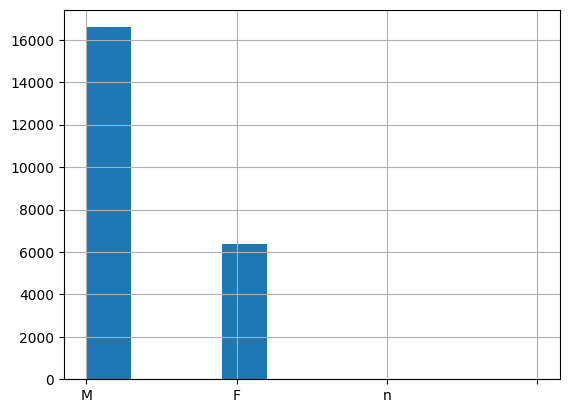

In [8]:
df['sex'] = df['Defendant_Sex'] # Categorical variable example
var = 'sex'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n') #
print(df[var].hist(), '\n') # About 72% of observations are male

[99  9  0  1] 

is_poor
0     11500
1     10465
9       747
99      274
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



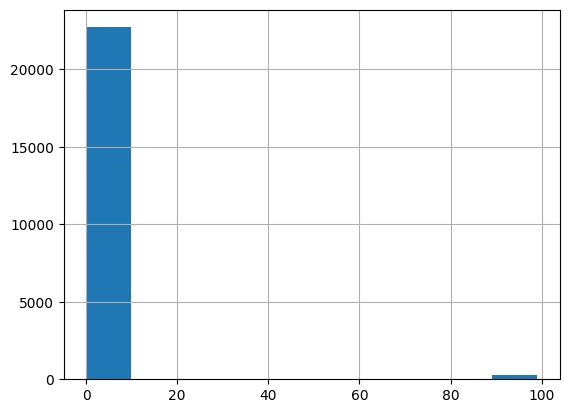

In [9]:
var = 'is_poor' # A dummy variable
print(df[var].unique(),'\n') # Notice these gooses have already messed up their coding
print(df[var].value_counts(), '\n') # Look at the 9 and 99: That is awful
print(df[var].hist(), '\n') # What is "bad" about this plot?

['31' '60' '27' '28' '39' '35' '18' '21' '66' '25' '38' '22' '40' '48'
 '34' '37' '20' '54' '46' '58' '55' '51' '24' '32' '30' '36' '26' '43'
 '56' '49' '19' '50' '52' '41' '29' '33' '42' '53' '44' '59' '45' '23'
 '63' '57' '47' '61' '78' '65' '67' '64' '62' '74' '68' '70' '69' '80'
 '75' '77' '73' '71' '72' ' ' '79' '81' '85' '100' '82' '76' '83' '93' '0'
 '99' '84' '87' '86' '92' '88'] 

Axes(0.125,0.11;0.775x0.77) 



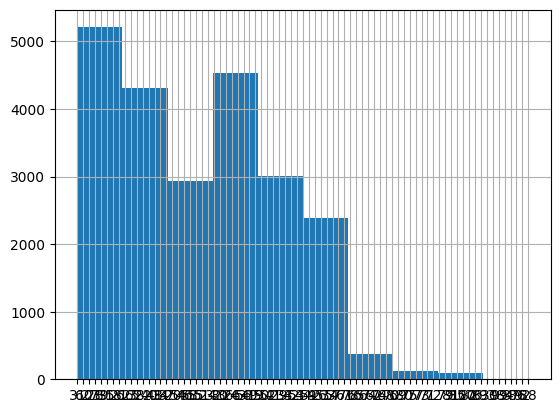

In [10]:
var = 'age' # A numeric variable
print(df[var].unique(),'\n') # Do you see some problem values? --> whoever entered the data, they put a 'space' for empty data so when pandas read in it, it assumed age was a string
print(df[var].hist(), '\n') # This does not look very good.

## Missing Data
- To make progess on this cleaning this variable, we have to do something about that space `' '`: It's a **missing value**
- Data are *missing* if their values are not recorded in the dataset
- Data are typically missing in different ways: There might simply be no recorded value at all -- `... , , ...` -- in the data or it might be recorded but as a specific missing value value code like `"NA"` or `-999` or `Don't Know` or `Refusal` --- **check the codebook**
- We can't really get started on doing interesting things if the data are full of missings: Pandas will just treat the variable as an object
- Handling missing data is the most important issue when you clean a data set

## Why do we care about missing data?
- Abraham Wald was a statistician during WWII, working for the United States. They asked him to solve a problem. Planes would come in after a battle, hit from enemy fire:

<img src="https://github.com/ashleynguyen04/wrangling/blob/main/src/plane.png?raw=1" width='400' height='380' />

- Where does additional armor go to improve odds of survival? --> might think to put armour where plane is hit most commonly (the red dots); however, he are looking at this plane because it was hit multiple times in these areas and survived. So actually you would place the armour where the plane isn't commonly hit because if it was hit there, the plane would no longer function (ex: the cockpit doesn't have red dots on it, but should put armor there)

## Other Missing Data Examples
- Other examples:
    - People who get married have higher salaries, on average
    - People who drink wine have longer lifespans, on average
    - Use of cannabis and psychedelic drugs has been linked to mental illness
    - Many places that imposed stricter pandemic protocols had worse outcomes than places that didn't (e.g. NYC vs Cville)
- In social science, every interesting problem is fundamentally a missing data issue
- "Correlation does not imply causation" isn't a vibe or slogan, it's a mathematical reality with quantitative models and tools for measuring and correcting for the bias

## `nan`'s and Pandas
- In Pandas, there are two options for representing missing values
    - The default is to treat it as an `np.nan` from the NumPy package: "Not-a-number", and its type is `float`
    - Pandas can also treat a missing value as a `None`: An empty/null object without a type or value
- We want to responsibly deal with the presence of the missing values without making bad choices that interfere with subsequent analysis
- You will often have to add the `.nan`s yourself; Pandas brings a lot of empty variable entries in as an empty string

## Cleaning Numeric Variables
- Often, numeric variables include units like dollar signs or separators like commas in their values that need to be cleaned in addition to values that simply aren't recorded: Otherwise, Pandas will drop those values, which can be a big mistake
- To clean a numeric variable:
    1. Cleaning: Remove symbols like units (e.g. `$`) or separators (e.g. `1,000`) to preserve as much data as possible using `df[var].str.replace(pattern, replacement)`
    2. Coercion: Coerce the values to numeric using the Pandas method `pd.to_numeric(var)`

Before coercion: 
 count     22986
unique       77
top          27
freq        939
Name: age, dtype: object 



<Axes: >

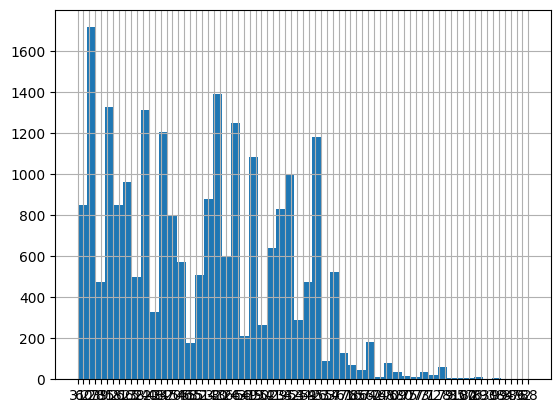

In [11]:
var = 'age' # We'll clean the age variable
print('Before coercion: \n', df[var].describe(),'\n') # The age variable is not read by Pandas as a number
df[var].hist(bins=50) # Initial histogram; check out the x axis

After coercion: 
 count    22931.000000
mean        34.276525
std         12.468031
min          0.000000
25%         24.000000
50%         31.000000
75%         42.000000
max        100.000000
Name: age, dtype: float64 

Total Missings: 
 55 



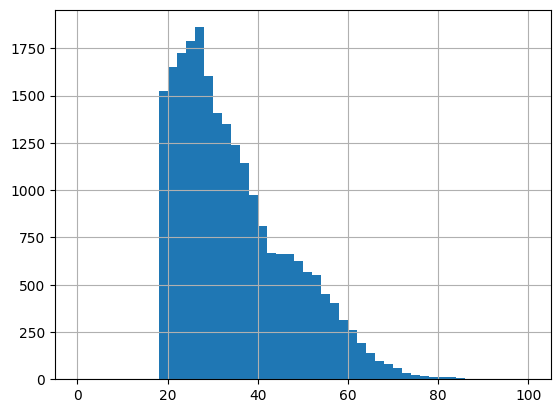

In [12]:
## An example of type coercion:

# How to coerce a variable to numeric:
df['age'] = pd.to_numeric(df['age'], errors='coerce') # Coerce the variable to numeric

# Create a missing dummy:
df['age_nan'] = df['age'].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', df['age'].describe(),'\n') # Describe the numeric variable
df['age'].hist(bins = 50) # Histogram of the variable values
print('Total Missings: \n', sum(df['age_nan']),'\n') # How many missing values are there?

## Imputation
- So you have those `np.nan` values left in the data frame, what do you do with them?
- It depends... probably nothing, for now. We want to know the data are missing: It's information.
- Alternatively, you can replace the missing value with something else: This is called **imputation**
- Whether or not the imputation strategy is a good one depends on the subsequent analysis. Typically, people either:
    1. Add a "missing value dummy" to the dataframe that takes the value 1 if the value was missing and 0 if not using `df[var].isnull()`, then replace missing values with zero, the mean, or the median using `df[var].fillNA(value)`
    2. Use a predictive model to replace the missing values with a reasonable guess of the missing value, trained on the non-missing data
    3. Use algorithms that explicitly allow data to be missing
- Imputation is often a bad idea. Do not do it carelessly, or because you feel like you just have to do something to get rid of NA's.

In [13]:
## An Example of Imputation:

# Create a missing dummy:
df['age_na'] = df['age'].isnull() # Equals 1 if missing, 0 if non-null

# Compute the value to impute, in this case the median:
impute_value = df['age'].median() # Or mean, or whatever

# Impute the median of the non-missing data:
df['age_impute'] = df['age'].fillna(impute_value)

df['age_impute'].head()

,age_impute
0,31.0
1,60.0
2,27.0
3,27.0
4,28.0


## Cleaning Categorical Variables
- Cleaning categorical variables is even easier than numeric variables
- To clean a categorical variable,
    - Option 1: Replace each type of missing value with a new category that indicates the information about why the variable is missing, as appropriate
    - Option 2: Replace missings with `.nan`, and create a dummy for each qualitative type of missing value
- With the pretrial data, good examples of this are `case_type` and `is_poor`

## Multiple Missing Types
- Sometimes, data have more than one flavor of missing:

<img src="https://github.com/ashleynguyen04/wrangling/blob/main/src/NA_codes.jpg?raw=1" width='400' />

- In a case like this, you make sure there's a unique category for each kind of missing that might occur
- Why might this matter? Imagine a household survey question about drug use or multiple numerals for a dummy
- An example of this is (unintentionally) the `is_poor` variable


In [14]:
var = 'case_type'
print(df[var].unique(), '\n') # A Categorical Example (F = felony, M = misdemanor, S = special penalty, I = infraction )
df[var] = df[var].replace(' ',np.nan) # Notice the column replacement (replace ' ' with 'Not-a-number' type float)
print(df[var].value_counts(), '\n')
#
var = 'is_poor' # A Dummy Example
print(df[var].unique(), '\n')
df[var] = df[var].replace( [9,99], np.nan) # Notice the list (replace 9 or 99 type int with 'Not-a-number' type float)
print(df[var].value_counts())

['F' 'M' 'S' ' ' 'I'] 

case_type
M    13616
F     7029
S     2309
I        6
Name: count, dtype: int64 

[99  9  0  1] 

is_poor
0.0    11500
1.0    10465
Name: count, dtype: int64


## Dummy Variables, One Hot Encoding
- Ultimately, how do we process categorical -- brand of a car, species of animal, words in a sentence -- data for analytical methods?
- We take the single categorical variable taking $K$ values, and create $K$ variables, where the value for each new variable corresponds to the original categorical label
- We call these **dummy variables**, or say they are **one hot encoded**
- In our example, we'll take the since `case_type` variable, taking values F, I, M, and S, and convert it into four new variables, taking the value 1 if the original `case_type` was F, I, M, or S, respectively
- This allows us to process essentially any kind of categorical data: Just convert it from the text labels into a matrix of 0's and 1's
- We will often want to drop one of the categories. That dropped category serves as a baseline category in analytical techniques. The option to do this is `drop_first = True`.
    - The intuition is that if I have $K-1$ of the $K$ values, then I know what the $K$-th value must be, so using all $K$ variables rather than $K-1$ can be redundant

In [15]:
df_ct = pd.get_dummies(df['case_type']) # This helps with intuition
df_ct.head()

,F,I,M,S
0,True,False,False,False
1,True,False,False,False
2,False,False,True,False
3,False,False,True,False
4,True,False,False,False


In [16]:
df_ct = pd.get_dummies(df['case_type'], drop_first=True, dtype=int) # This is how we typically want the results
df_ct.head() # Which category was dropped? Is that ideal? --> F column was dropped b/c if I M S are all 0, we know it was a F (felony)

,I,M,S
0,0,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,0,0


## Dataframe Manipulation
- Ok, we've handled the missing values, but there's typically more to do
- We then might want to focus on subsets of the data by **filtering** the rows or columns
- We might also want to combine multiple datasets together: This is called a **merge**, which takes the form of a **concatenation** or **join**
- Later on, we'll talk about feature engineering and other ways of transforming variables for analytical purposes

## Logical Operators
- Often, we want to check a logical condition for every observation
- These are some of the most commonly used operators:

| Operator | Meaning |
| :---: | :---:|
| `and` | and |
|`or` | or |
|$==$, $!=$ | equivalence, inequivalence |
|`<=`,`<` | less-than-equal-to, less-than |
| `in`, `not in`| set membership, set non-membership |

- For example, we'll want to determine the observations for which `df['is_poor'] == (9 or 99)`
- Other times we want a combination of conditions:
- Knowing how to construct logical tests is super useful

## Row Filtering: Taking Subsets of the Observations
- We often want to focus only on a subset of the observations, like defendants accused of a felony
- We can **filter** on a conditional/Boolean statement, selecting the rows that get a 1 and discarding those that get a zero
- This creates a new dataframe, focused just on what we're interested in: `df['case_type']=='F'`
- For example, in the case of felonies, we can create a new dataframe: `df_felony = df[ df['case_type']=='F' ]`In general, the syntax is
 `new_df = df[ conditional ]`

In [32]:
print(df['case_type'].value_counts(), '\n') # How many charges of each type?
conditional =  (df['case_type']=='F') # Conditional: The charge is a felony
print(conditional.value_counts(), '\n') # Counts for the conditional variable: 7029 True

df_felony = df[ conditional ] # Create new dataset
print('Old dataframe: ', df.shape, '\n', 'New dataframe: ', df_felony.shape) # Dimensions of original and new dataframes: 7029 rows

case_type
M    13616
F     7029
S     2309
I        6
Name: count, dtype: int64 

case_type
False    15957
True      7029
Name: count, dtype: int64 

Old dataframe:  (22986, 716) 
 New dataframe:  (7029, 716)


## Column Filtering: Taking Subsets of the Variables
- Suppose you only have a few variables you're actually interested in, or you might not want to release some sensitive data like names or phone numbers
- You can use `new_df = df.filter( list )` to keep a specific set of variables in the list `list = [var1, var2, ..., varN]`
- You can use `new_df = df.drop( list, axis=1 )` to drop a specific set of variables in the list `list = [var1, var2, ..., varN]`
- For example, we might want only the demographic data, `list = ['Defendant_Age', 'Defendant_Sex', 'Defendant_Race']`... or we might want to hide those variables for privacy reasons

In [18]:
list = ['Defendant_Age', 'Defendant_Sex', 'Defendant_Race']
new_df = df.filter(list) # Keep only the variables on the list
print( new_df.columns, '\n', new_df.shape, '\n')

new_df = df.drop(list,axis=1) # Drop only the variables on the list
print( new_df.columns, '\n', new_df.shape)

Index(['Defendant_Age', 'Defendant_Sex', 'Defendant_Race'], dtype='object') 
 (22986, 3) 

Index(['InternalStudyID', 'REQ_REC#', 'Defendant_BirthYear',
       'Defendant_AgeGroup', 'Defendant_AgeatCurrentArrest',
       'Defendant_AttorneyTypeAtCaseClosure', 'is_poor',
       'Defendant_RecordedZipCode_eMag', 'Defendant_VirginiaResidencyStatus',
       'released',
       ...
       'NewFelonySexualAssaultArrest_Disposition',
       'Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis',
       'CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual',
       'DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound',
       'CrimeCommission2021ReportClassificationofDefendants', 'age', 'sex',
       'age_nan', 'age_na', 'age_impute'],
      dtype='object', length=711) 
 (22986, 711)


## The `.query` and `.isin` Functions
- There are nice to know
- The `.query` function allows you to write a Boolean conditional as a text string, then pass it to the query method:
`df.query(conditional)`:

In [19]:
conditional = " case_type == 'F' & age < 70 & (Defendant_Race == 'W' or Defendant_Race == 'B') "
df_cond = df.query(conditional)
df_cond.shape

(6934, 714)

- Similarly, sometimes you want to conditional on a variable appearing on a list of values. This is easy to do with `.isin(list)` and a filter:

In [20]:
df_cond = df[ df['Defendant_Race'].isin(['W','B']) ]
df_cond.shape

(22506, 714)

## Locator Functions
- The method I probably use the most from Pandas is `.loc`, the locator function, because I am too lazy to remember the foregoing functions.
- If you want to filter on columns and rows at the same time, you can use the **locator function**, `df.loc[indices, col_labels]`, where you pass lists of indices (or `:` or a conditional vector) and a list of column labels. This returns the intersection of those rows and columns.
- If you want to pull particular rows or columns, or otherwise **slice** the dataframe, you can use the **integer locator class method** `df.iloc[x:y,a:b]` for numeric address, literally picking the $x$-th to $y-1$-st rows and $a$ up to $b$ columns in terms of their "physical location" in the data frame.
- These functions are a nightmare to work with.

In [21]:
print(df.iloc[0:5,0:5],'\n') # Show the zero-th to fourth rows/zero-th to seventh columns

  InternalStudyID REQ_REC# Defendant_Sex Defendant_Race Defendant_BirthYear
0        ADI00001        1             M              W                1986
1        ADI00007        3             M              B                1956
2        ADI00008        4             M              W                1990
3        CDI00036        6             M              B                1989
4        CDI00038        7             F              W                1988 



In [22]:
print(df.loc[0:5,('Defendant_Sex','Defendant_Race')],'\n') # Show rows 0:5 of Sex and Race

  Defendant_Sex Defendant_Race
0             M              W
1             M              B
2             M              W
3             M              B
4             F              W
5             M              B 



## Merging/Concatenating Dataframes
- We often have dataframes from multiple sources, and want to combine them together for analysis, or **merge** them. There are three broad approaches:
    - Concatenation: Smash the two matrices together horizontally or vertically (not quite with Pandas, it's on the index)
    - Inner Join: If an index appears in one dataframe but not the other, drop those rows (intersection of keys)
    - Outer Join: If an index appears in one dataframe but not the other, keep it, replacing missing values with zero (union of keys)
- To illustrate this, we'll make up two data frames from our justice data with a common identifying variable, then merge them back together
- This also illustrates how to add your one-hot encoded variables to a dataframe: Concatenate them back in

In [23]:
## Case type data with an id variable:
df_ct = pd.get_dummies(df['case_type'],dtype=int)
df_ct['sex'] = df['Defendant_Sex']
df_ct['id'] = df['InternalStudyID']
print(df_ct.head())

## Age group data with an id variable:
df_age = pd.get_dummies(df['Defendant_AgeGroup'],dtype=int)
df_age['race'] = df['Defendant_Race']
df_age['id'] = df['InternalStudyID']
print(df_age.head())


   F  I  M  S sex        id
0  1  0  0  0   M  ADI00001
1  1  0  0  0   M  ADI00007
2  0  0  1  0   M  ADI00008
3  0  0  1  0   M  CDI00036
4  1  0  0  0   F  CDI00038
   2  3  4  5  6  7  9 race        id
0  0  1  0  0  0  0  0    W  ADI00001
1  0  0  0  0  1  0  0    B  ADI00007
2  0  1  0  0  0  0  0    W  ADI00008
3  0  1  0  0  0  0  0    B  CDI00036
4  0  1  0  0  0  0  0    W  CDI00038


In [24]:
## Concatenation:
df_concat = pd.concat( [df_ct, df_age] , axis=1) # Column concatenation; row isn't possible
print('Concatenation dimensions: ', df_concat.shape)
df_concat.head()

Concatenation dimensions:  (22986, 15)


,F,I,M,S,sex,id,2,3,4,5,6,7,9,race,id
0,1,0,0,0,M,ADI00001,0,1,0,0,0,0,0,W,ADI00001
1,1,0,0,0,M,ADI00007,0,0,0,0,1,0,0,B,ADI00007
2,0,0,1,0,M,ADI00008,0,1,0,0,0,0,0,W,ADI00008
3,0,0,1,0,M,CDI00036,0,1,0,0,0,0,0,B,CDI00036
4,1,0,0,0,F,CDI00038,0,1,0,0,0,0,0,W,CDI00038


In [25]:
## Joining:
df_a = df_age.sample(frac=.8) # We'll sample 80% of the rows at random

df_inner = pd.merge(df_a,df_ct, how='inner', on=['id','id'])
print('Inner join dimensions: ', df_inner.shape)

df_outer = pd.merge(df_a,df_ct, how='outer', on=['id','id'])
print('Outer join dimensions: ', df_outer.shape)

Inner join dimensions:  (18389, 14)
Outer join dimensions:  (22986, 14)


## When are the data "clean"?
- For the kinds of analysis we do, the data are *clean* when:
  - The data are in a single $N \times K$ matrix $X$
  - Each row $i=1,...,N$ represents a single observation
  - The observations are all of the same kind (e.g. entrepreneurs versus companies)
  - Each column $k=1,...,K$ represents a variable
  - Missing values are appropriately "handled" (converted to `.nan` where appropriate or imputed/missing-dummied when appropriate -- not still lurking as `dtype=object`'s)
  - If the data are contained in multiple files, you end up with a single dataframe combining all the relevant data for the subsequent analysis
- We might also want some other things (this updgrades "clean" to "tidy"):
  - The variable names make sense (not "NewVaCode297ViolentOff_VCCPrefix")
  - "Unnecessary" variables are removed
  - Dates are converted into numerical values, like decimal date (e.g. 2018.125) or numeric dummies

## Investigating Missing Data: A Case Study
- Handling the `.nan`'s is really just the first step with missing data
- For key variables, you want to eliminate as many `.nan`'s as possible through detective work
- Let's take a look at the `bond` variable: This is a crucial variable in the justice system, and most of the values are missing
- This is an example of a variable with a **long tail** of values

count     16912.000000
mean       1464.159413
std        2923.362046
min           0.000000
25%           0.000000
50%        1000.000000
75%        2500.000000
max      160000.000000
Name: bond, dtype: float64 

6074 



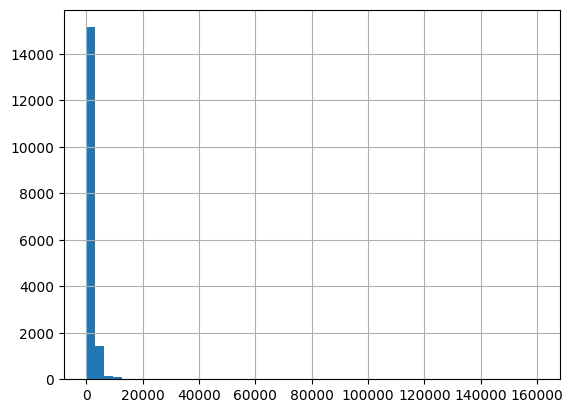

In [45]:
var = 'bond'
df[var] = pd.to_numeric(df[var], errors='coerce') # Coerce the variable to numeric

print(df[var].describe(),'\n') # Describe the numeric variable
df[var].hist(bins = 50) # Histogram of the variable values

df['bond_NA'] = df[var].isnull() # Create a bond missing dummy; long tail

print(sum(df['bond_NA']),'\n') # How many missing values are there?


## Investigating Missing Data: Cross tabulation
- The relationships between variables are important, and we want a quick way of seeing how they relate
- *Cross tabulation* is when you break two variables into categories, and enumerate the number in each of the bins
- The call in Pandas is `pd.crosstab( df[var1], df[var2] )`
- Notice this is a Pandas method (`pd.`) and not a dataframe object method (`df.`)
- This is often the first step in determining how variables co-vary with one another, before computing a statistic or using a model

In [46]:
pd.crosstab(df['is_poor'], df['case_type']) # Notice the use of pd. and not df.

case_type,F,I,M,S
is_poor,,,,
0.0,2393,3,8189,905
1.0,4466,3,4748,1239


## Investigating Missing Data: A Case Study
- Let's see if we can explain *why* bond is missing so much using other variables, like whether the person was released pre-trial or the type of bond imposed.
- In the codebook, we have (notice, no category 8...):
  
![Bond Types](https://github.com/ashleynguyen04/wrangling/blob/main/src/bondType.png?raw=1)



In [47]:
df['bond_NA'] = df['bond'].isnull()
print(pd.crosstab(df['bond_NA'],df['PretrialReleaseType1']),'\n') # Not very illuminating

PretrialReleaseType1     0     1     2     3     4    5   6    7    8    9
bond_NA                                                                   
False                  390  1813  5273  5473  3032   45  12  347  396  131
True                  3411    81     0   307   992  130   0  229  729  195 



In [48]:
print(pd.crosstab(df['bond_NA'],df['BondTypeAtInitialContact']),'\n') # Bingo

BondTypeAtInitialContact     1     2     3     4    5     6    7  9
bond_NA                                                            
False                        0  4149  5419  1805  254  5285    0  0
True                      5953     0     0     0    0     0  117  4 



- From here, we can see what's going on: The bond is missing for groups 1, 4, 5, 6, 7, and 9, which are Held Without Bond, Personal Recognizance Bond, No decision, Release on summons, Direct indictment, or Missing. Only codes 2 and 3 correspond to a secured or unsecured bond.
- For groups 4 and 6, it's as if the bond is zero: There's no financial stake set at the hearing for the defendant that determines whether they are free to leave or not
- For groups 5, 7, and 9, a value of "missing" seems fair
- For group 1, these are the people held without bond.
- Combining all these codes seems like a very serious issue.

## Replacing Values
- So we want to replace certain values of the **bond** depending on values of the **bond type**
- There are (at least) two ways to do this:
    - Use `df.loc[ condition, var] = value` to replace the value of variable `var` with `value` depending on whether `condition` is true
    - Use `df[var].mask(condition,value)` to replace the value of variable `var` with `value` depending on whether `condition` is true
- We have a serious dilemma with bond category 1

Axes(0.125,0.11;0.775x0.77) 

count     16912.000000
mean       1464.159413
std        2923.362046
min           0.000000
25%           0.000000
50%        1000.000000
75%        2500.000000
max      160000.000000
Name: bond, dtype: float64 

BondTypeAtInitialContact     1     2     3     4    5     6    7  9
bond_NA                                                            
False                        0  4149  5419  1805  254  5285    0  0
True                      5953     0     0     0    0     0  117  4 



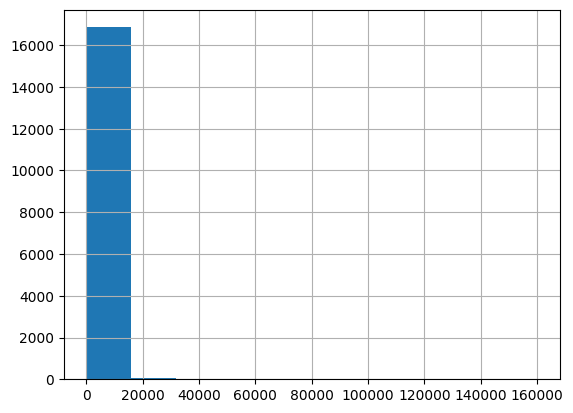

In [30]:
## For each bond type, replace the missings

# df.loc[ df['BondTypeAtInitialContact'] == 9, 'bond'] = np.nan # Missing
# df.loc[ df['BondTypeAtInitialContact'] == 7, 'bond'] = np.nan # Unknown

# Code strategy 1: .loc
df.loc[ df['BondTypeAtInitialContact'] == 6, 'bond'] = 0 # No bond posted
df.loc[ df['BondTypeAtInitialContact'] == 5, 'bond'] = 0 # No bond posted
df.loc[ df['BondTypeAtInitialContact'] == 4, 'bond'] = 0 # No bond posted

# Code Strategy 2: .mask method
df['held_wo_bail'] = (df['BondTypeAtInitialContact'] == 1) # Create a held-without-bail dummy
df['bond'].mask(df['BondTypeAtInitialContact'] ==1 , np.nan ) # Held without bail. Nan or Inf? What is the price of freedom?

print(df['bond'].hist(), '\n')
print(df['bond'].describe(), '\n')
df['bond_NA'] = df['bond'].isnull() # Update the missing dummy
print(pd.crosstab(df['bond_NA'],df['BondTypeAtInitialContact']),'\n')


## Investigating Missing Data: A Case Study
- Notice how we handled the "held without bail issue": There is a lot of nuance here
- At this point, I'd drop categories 7 and 9, and leave the missing bond values as "held without bail"
- You might be thinking, "He is really into analyzing bonds!"
- Not exactly: Cleaning data sets requires some detective work, that's what we're illustrating
- The cleaner your data are, the stronger the *signal* becomes relative to the *noise*, reducing *attenuation* of your findings
- It requires your full cognitive attention, or your results will be garbage that makes everyone less informed, knowledgeable, and productive ("GIGO")
- What are the consequences for society if you do a garbage analysis of bonds and sentencing?
- We can't get this deeply into every variable in the data, but we must do it for the key ones for our analysis
- So how do we continue cleaning up the `bond` variable?

## Saving Your Clean Data
- Do not ever overwrite the original data file: Put it aside and save it for reproducibility purposes
- The most common format to save data in is `.csv`, and the command is almost the same as the one to read the data in: `df.to_csv(filename)`
- The `.csv` format is probably so ubiquitous because humans can read it. This also means that it's somewhat inefficient, in terms of saving and loading, since it doesn't take advantage of any replication of values within a given variable (e.g. 0 and 1)
- If you are working with reasonably large datasets (>5MB), at this point I would recommend Parquet instead (`pd.read_parquet()`, `df.to_parquet()`), but it often requires installing more packages to support it (PyArrow)

In [31]:
df.to_csv('./data/pretrial_data.csv') # Save cleaned data to a csv file in ./data for later use
#df.to_parquet('pretrial_data.parquet') # Save cleaned data to a csv file for later use

OSError: Cannot save file into a non-existent directory: 'data'